# HOMEWORK 3
#### Submitted By: Bhavish Kumar
#### Date: 13th October 2020
### In this homework, we experiment with a Convolutional Neural Network (CNN) Implementation for Image Classification. 
#### We are using the Aliens & Predators Image dataset available on Kaggle (Link to Dataset: https://www.kaggle.com/pmigdal/alien-vs-predator-images) to train CNN network models to successfully classify images as Aliens or Predators. 
##### ** The 4 references which helped me complete this assignment have been mentioned below at the end of this notebook. I have cited these references in my comments/explanations inline using square brackets [ ]**

#### CNNs are the most widely used Networks for any image classification problem since images have spatial relationships in them. Spatial relationships mean that, the pixel has location based relationship with other pixels of the image.
In CNNs a filter of any defined size is moved over the image from top left to bottom right and Convolution operation is applied to get an output value based on the filter. On the output values obtained from the filter, Max Pooling is done to obtain the largest value. The purpose of using a Max Pooling layer is that, sometimes only the relative location of a pixel matters and not its exact location.
Pooling Outputs are not affected by small transaltions/transformations to the input. By doing Pooling, even small changes to the input will not change the output.
[4]

In [10]:
### IMPORTING The REQUIRED LIBRARIES
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt

#### The ImageDataGenerator is used to make transformations to our image before the training process. This is done when the training data has a small number of examples and so that our model will be able to train on a wide variety of data as we would be supplying different forms of the image by doing these transformations. This also helps to reduce overfitting as the model is getting trained on a variety of examples. [1]
#### Here is what each of these parameters mean:
###### a. rescale is any value multiplied on the original pixel value. Since our pixels are in RGB, we are normalizing this by dividing by 255
###### b. zoom_range is for zooming into pictures
###### c. rotation_range - value in degrees (0-180), to randomly rotate pictures

In [2]:
training_datagenerator = ImageDataGenerator(rescale=1/255,zoom_range=0.2,rotation_range=15) ### To generate Training Data
validation_datagenerator = ImageDataGenerator(rescale=1/255) ### To generate Validation Data

The .flow_from_directory() function can be used to create batches of image data with their respective labels to help us perform batch gradient descent using CNN. The labels/classes of each image will be directly obtained from the folders. In our case, in the path specified below, inside our train folder, we have 2 sub folders (one for Alien Class & one for Predator Class). Hence, the training_data has read the 694 images belonging to 2 classes & created batches of batch_size 32. [1]

In [3]:
training_data = training_datagenerator.flow_from_directory(
        directory='D:\\SYR ADS\\Sem 3\\CIS 731 ANN\\HW3\\alien_vs_predator_thumbnails\\data\\train',
        class_mode='binary', ## Since this is a binary classification problem, we will use binary_crossentropy loss
        color_mode='rgb',  ## Since our images are in RGB scale, we specify the color_mode as 'rgb'.
        target_size=(256,256),  ## To resize our images 256x256 pixels.  
        batch_size=32
)

Found 694 images belonging to 2 classes.


Similarly, we obtained 200 validation images belonging to the 2 classes Alien & Predator

In [4]:
validation_data = validation_datagenerator.flow_from_directory(
        directory='D:\\SYR ADS\\Sem 3\\CIS 731 ANN\\HW3\\alien_vs_predator_thumbnails\\data\\validation',
        class_mode='binary',
        color_mode='rgb',
        target_size=(256,256),
        batch_size=10
)

Found 200 images belonging to 2 classes.


### Building the CNN Network
### We will try to implement the following 2 different types of Networks & compare their performances:
##### 1. Network with 2 CONVOLUTIONAL layers followed by flattening & 1 fully connected Dense Relu Layer followed by 1 output node with Sigmoid Activation Function (to obtain values between 0 & 1 which will aid binary classification)
##### 2. Deep Network with 5 CONVOLUTIONAL layers along with MaxPooling Layers after each Conv Layer and then a flattening layer followed by 2 fully connected Relu Dense Layers and then an output node followed by Sigmoid Activation Function to aid binary classification

### 1. Network One Architecture: [Two Conv Layers -> One Dense Layer-> Output Layer with One Node]
In the below code, we are specifying the shape of the input images as 256x256x3 and for both the hidden convolutional layers, we are specifying 10 filters of shape 3x3 pixels. These convolutional layers are followed by a relu dense layer with 256 nodes and a 1 node output layer with Sigmoid Activation function. 
Reference [1] as cited below was used for guidance on setting up CNN architecture.

In [5]:
### Model1_sh is shallower than Model2
model1_sh = Sequential()
model1_sh.add(Conv2D(10,(3,3),input_shape=(256,256,3)))  ### 1st Convolutional Hidden layer with 10 filters of size 3x3 pixels 
model1_sh.add(Conv2D(10,(3,3)))     ### 2nd Convolutional Hidden layer with 10 filters of size 3x3 pixels 
model1_sh.add(Flatten())        ### Layer to Flatten the 2D data to 1D data before passing it to dense layer
model1_sh.add(Dense(256,activation='relu'))
model1_sh.add(Dropout(0.2))  ### to dropout some nodes & control for overfitting
model1_sh.add(Dense(1,activation='sigmoid')) ## Sigmoid Activation Function at the output layer having 1 node

#### Training the model
Using 'binary_crossentropy' loss function since this is a classification problem. Using the 'rmsprop' optimizer & 'accuracy' metric

In [9]:
### Using 20 epochs for training
epoch=20
model1_sh.compile(optimizer='rmsprop',metrics='accuracy',loss='binary_crossentropy')
### Using the fit_generator() function to Train the CNN on the Train Data & evaluate Training & Validation Accuracy and Loss
hist=model1_sh.fit_generator(training_data,
                        steps_per_epoch=21,
                        validation_data=validation_data,
                        validation_steps=20,
                        epochs=epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
21/21 [==============================] - 59s 3s/step - loss: 73.2542 - accuracy: 0.5272 - val_loss: 21.3015 - val_accuracy: 0.5150
Epoch 2/20
21/21 [==============================] - 40s 2s/step - loss: 7.1389 - accuracy: 0.5574 - val_loss: 1.8380 - val_accuracy: 0.6150
Epoch 3/20
21/21 [==============================] - 36s 2s/step - loss: 4.5816 - accuracy: 0.5574 - val_loss: 64.8701 - val_accuracy: 0.5000
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 5.4817 - accuracy: 0.5831 - val_loss: 0.6000 - val_accuracy: 0.6700
Epoch 5/20
21/21 [==============================] - 36s 2s/step - loss: 0.7501 - accuracy: 0.6148 - val_loss: 0.6054 - val_accuracy: 0.5750
Epoch 6/20
21/21 [==============================] - 36s 2s/step - loss: 1.7351 - accuracy: 0.6176 - val_loss: 0.6550 - val_accuracy: 0.5650
Epoch 7/20
21/21 [==============================] - 35s 2s/step - loss: 0.8161 - 

#### NETWORK 1: Plotting Training & Validation Loss VS Epochs

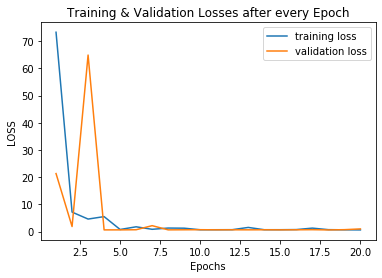

In [13]:
d=hist.history
plt.plot(range(1,epoch+1),d['loss'],label='training loss')
plt.plot(range(1,epoch+1),d['val_loss'],label='validation loss')
plt.legend()
plt.title('Training & Validation Losses after every Epoch')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.show()
#plt.plot(weight_updates,MS

#### NETWORK 1: Plotting Training & Validation Accuracies VS Epochs

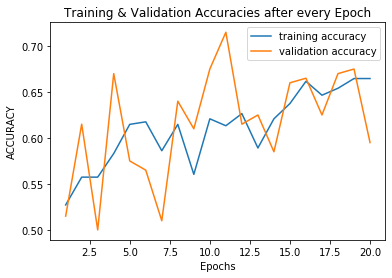

In [14]:
plt.plot(range(1,epoch+1),d['accuracy'],label='training accuracy')
plt.plot(range(1,epoch+1),d['val_accuracy'],label='validation accuracy')
plt.legend()
plt.title('Training & Validation Accuracies after every Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

### 2. Network Two Architecture: [Five Conv Layers with Max Pooling -> Two Dense Layers -> Output Layer with 1 Node]
In the below code, we are specifying the shape of the input images as 256x256x3 and using the same configurations as above, with the difference being in the number of Convolutional Layers and the introduction of MaxPooling Layers. [1]

In [18]:
model2_deep=Sequential()
model2_deep.add(Conv2D(32,(3,3),input_shape=(256,256,3))) ### 1st Convolutional Hidden layer with 32 filters of size 3x3 pixels
model2_deep.add(MaxPooling2D(pool_size=(2, 2)))  ### 1st MaxPooling layer of size 2x2
model2_deep.add(Conv2D(32,(3,3)))   
model2_deep.add(MaxPooling2D(pool_size=(2, 2)))
model2_deep.add(Conv2D(32,(3,3)))
model2_deep.add(MaxPooling2D(pool_size=(2, 2)))
model2_deep.add(Conv2D(32,(3,3)))
model2_deep.add(MaxPooling2D(pool_size=(2, 2)))
model2_deep.add(Conv2D(32,(3,3)))
model2_deep.add(MaxPooling2D(pool_size=(2, 2)))
model2_deep.add(Flatten())      ### Flattening the 2D data to 1D to be used for the Dense layers
model2_deep.add(Dense(512,activation='relu'))  ### 1st Dense Layer with Relu Activation Function
model2_deep.add(Dropout(0.2))
model2_deep.add(Dense(512,activation='relu'))
model2_deep.add(Dense(1,activation='sigmoid'))  ### Output Layer with Sigmoid Activation Function

#### Training the model
Using 'binary_crossentropy' loss function. Using the 'rmsprop' optimizer & 'accuracy' metric

In [19]:
#### Using 20 epochs again
epoch=20
#### Using the binary_crossentropy loss function again
model2_deep.compile(optimizer='rmsprop',metrics='accuracy',loss='binary_crossentropy')
### Using the fit_generator() function to Train the CNN on the Train Data & evaluate Training & Validation Accuracy and Loss
hist_deep = model2_deep.fit_generator(training_data,
                        steps_per_epoch=21,
                        validation_data=validation_data,
                        validation_steps=20,
                        epochs=epoch)

Epoch 1/20
21/21 [==============================] - 19s 905ms/step - loss: 1.0424 - accuracy: 0.5453 - val_loss: 0.6971 - val_accuracy: 0.5350
Epoch 2/20
21/21 [==============================] - 22s 1s/step - loss: 0.7080 - accuracy: 0.5589 - val_loss: 0.6505 - val_accuracy: 0.6200
Epoch 3/20
21/21 [==============================] - 21s 1s/step - loss: 0.6633 - accuracy: 0.6254 - val_loss: 0.8415 - val_accuracy: 0.6100
Epoch 4/20
21/21 [==============================] - 22s 1s/step - loss: 0.6622 - accuracy: 0.6193 - val_loss: 0.6975 - val_accuracy: 0.6500
Epoch 5/20
21/21 [==============================] - 22s 1s/step - loss: 0.6767 - accuracy: 0.6375 - val_loss: 0.5798 - val_accuracy: 0.6450
Epoch 6/20
21/21 [==============================] - 21s 1s/step - loss: 0.5781 - accuracy: 0.7160 - val_loss: 0.5902 - val_accuracy: 0.6600
Epoch 7/20
21/21 [==============================] - 22s 1s/step - loss: 0.5631 - accuracy: 0.7130 - val_loss: 0.6205 - val_accuracy: 0.6400
Epoch 8/20
21/21 

#### NETWORK 2: Plotting Training & Validation Loss VS Epochs

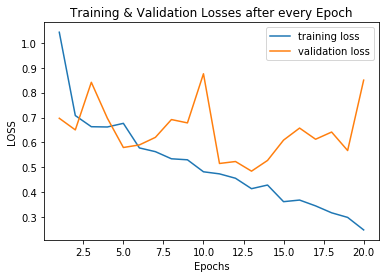

In [22]:
deep_cnn_df = hist_deep.history
plt.plot(range(1,epoch+1),deep_cnn_df['loss'],label='training loss')
plt.plot(range(1,epoch+1),deep_cnn_df['val_loss'],label='validation loss')
plt.legend()
plt.title('Training & Validation Losses after every Epoch')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.show()

#### NETWORK 2: Plotting Training & Validation Accuracies VS Epochs

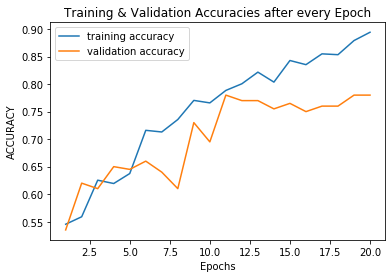

In [23]:
plt.plot(range(1,epoch+1),deep_cnn_df['accuracy'],label='training accuracy')
plt.plot(range(1,epoch+1),deep_cnn_df['val_accuracy'],label='validation accuracy')
plt.legend()
plt.title('Training & Validation Accuracies after every Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

OBSERVATION: From the above 2 plots of Network 2, we can observe that for this network, around 12 to 15 epochs are sufficient for training. Because, after 15 epochs, we can see that, the Training Accuracy & Loss are continuing to improve further more, whereas the Validation Accuracy is flattening & the Validation Loss starts to degrade after 15 epochs. This is a clear sign of Overfitting and hence, for this Network (Network 2) we need to stop training after 15 epochs.

### CONCLUSION

Based on the results obtained by running NETWORK 1(Two Conv Layers -> One Dense Layer-> Output Layer with One Node) and NETWORK 2 (Five Conv Layers with Max Pooling -> Two Dense Layers -> Output Layer with 1 Node), we can conclude that by using a deeper network with Max Pooling and with more convolutional layers having more filters, we are able to obtain a much better validation accuracy of ~78%. Whereas, by using a Shallower Network without Max Pooling layers, we were able to obtain a Validation Accuracy of only ~67%. Hence a deeper network with Max Pooling Layers is required to solve this problem in a better way.

# END of HOMEWORK 3

### References used for guidance:
1. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
2. https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
3. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
4. https://medium.com/analytics-vidhya/cnn-convolutional-neural-network-8d0a292b4498
5. http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf